<a href="https://colab.research.google.com/github/Page0526/Pytorch-crash-course/blob/main/deep-neural-networks/nlp/Neural_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Our task is to implement a based neural language model.

Training data: WikiText-2

Test data: WikiText-103

Evaluation criteria: Perplexity on the test dataset

Reference implementation: https://colab.research.google.com/drive/1-v8bRLr-UWQnxNA8m7Xpt4-XF8Ki_40T?usp=sharingLinks to an external site.

You are recommended to use the preprocessing function in the reference implementation to avoid distribution shifts.

Submission format: you have to submit the Jupyter Notebook. The notebook should clearly show that you use the WikiText-2 for training and WikiText-103 for testing. The perplexity should be displayed in the output, I will not rerun the code to get the perplexity.

# Sample from Lecturer

In [1]:
# interactive features of VSCode, Colab, Jupyter notebook
!pip install ipympl

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib widget
# from google.colab import output
# output.enable_custom_widget_manager()

In [3]:
train_data = """A closed-loop controller or feedback controller is a control loop which incorporates feedback, in contrast to an open-loop controller or non-feedback controller. A closed-loop controller uses feedback to control states or outputs of a dynamical system. Its name comes from the information path in the system: process inputs (e.g., voltage applied to an electric motor) have an effect on the process outputs (e.g., speed or torque of the motor), which is measured with sensors and processed by the controller; the result (the control signal) is "fed back" as input to the process, closing the loop"""
test_data = "TBD"

In [6]:
import tqdm
import re

'''
Preprocessing process
1. Lower all characters
2. Remove all characters that are not alpha-bet or number
3. Create vocab dictionary
4. Create token for words
'''
def processing(text: str):
    text = text.lower()
    corpus = re.sub(r'[^a-z\s]', '', text).split()
    vocab = sorted(set(corpus))
    vocab.append('<pad>')
    vocab.append('<unk>')
    word_2_id = {w: i for i, w in enumerate(vocab)}
    id_2_word = {i: w for i, w in enumerate(vocab)}
    text_id = [word_2_id[w] for w in corpus]

    return corpus, vocab, text_id, word_2_id, id_2_word

corpus, vocab, text_id, word_2_id, id_2_word = processing(train_data)

'''
Define a Neural Language Model
1. V = len of the vocab dictionary
2. D = dimension
3. N = context window
'''
V = len(vocab)
D = 100
N = 5
n_hidden = 512
net = nn.Sequential(
    nn.Embedding(num_embeddings=V, embedding_dim=D),
    nn.LeakyReLU(negative_slope=0.15),
    nn.Flatten(),
    nn.Linear(in_features=D*N, out_features=n_hidden),
    nn.LeakyReLU(negative_slope=0.15),
    nn.Linear(in_features=n_hidden, out_features=n_hidden),
    nn.LeakyReLU(negative_slope=0.15),
    nn.Linear(in_features=n_hidden, out_features=V)
)

'''
Loss fn = CrossEntropyLoss
Optimizer = Adam/SGD
EPOCHS = 100
'''
def train(text_id: list, net: nn.Module, lr: float, optimizer: str, nepochs: int, N: int):
    fig,ax = plt.subplots(1,1)
    losses = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr) if optimizer == "adam" else optim.SGD(net.parameters(), lr=lr)
    for ei in tqdm.trange(nepochs):
        for i in range(len(text_id) - N):
            inputs = torch.LongTensor(text_id[i:i+N]).reshape(1, -1)
            target = torch.LongTensor([text_id[i+N]])
            # inputs.shape -> [1, 5]
            output = net(inputs)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        losses.append(loss.item())
    ax.clear()
    ax.plot(losses)
    fig.canvas.draw()
    fig.canvas.flush_events()
    # test()    # perplexity
    return net


def test(text: str, net: nn.Module):
    pass


def text2id(text):
    corpus = text.lower()
    corpus = re.sub(r'[^a-z\s]', '', corpus).split()
    text_id = [word_2_id.get(w, V - 1) for w in corpus]
    return text_id


def predict(net: nn.Module, text: str, N: int):
    text_id = text2id(text)
    if len(text_id) < N:
        text_id = [word_2_id['<pad>']] * (N - len(text_id)) + text_id
        text_id = text_id[-N:]
    # print(f"{text_id=}")
    prob = net(torch.LongTensor(text_id).reshape(1, -1))
    prob = torch.softmax(prob, dim=1)
    # print(f"{prob=}")
    next_word_id = torch.argmax(prob).item()
    # print(f"{next_word_id=}")
    return id_2_word[next_word_id], prob.detach().numpy()[0]

def perplexity(net: nn.Module, text: str):
    pass

In [86]:
len(text_id), V

(95, 56)

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  1%|          | 1/100 [00:00<00:25,  3.87it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  2%|▏         | 2/100 [00:00<00:23,  4.09it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  3%|▎         | 3/100 [00:00<00:23,  4.11it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  4%|▍         | 4/100 [00:00<00:23,  4.09it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  5%|▌         | 5/100 [00:01<00:24,  3.86it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  6%|▌         | 6/100 [00:01<00:23,  4.03it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  7%|▋         | 7/100 [00:01<00:22,  4.13it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  8%|▊         | 8/100 [00:01<00:22,  4.17it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

  9%|▉         | 9/100 [00:02<00:22,  4.12it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 10%|█         | 10/100 [00:02<00:21,  4.15it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 11%|█         | 11/100 [00:02<00:21,  4.23it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 12%|█▏        | 12/100 [00:02<00:20,  4.23it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 13%|█▎        | 13/100 [00:03<00:20,  4.21it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 14%|█▍        | 14/100 [00:03<00:20,  4.27it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 15%|█▌        | 15/100 [00:03<00:19,  4.26it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 16%|█▌        | 16/100 [00:03<00:19,  4.23it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 17%|█▋        | 17/100 [00:04<00:19,  4.19it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 18%|█▊        | 18/100 [00:04<00:19,  4.21it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 19%|█▉        | 19/100 [00:04<00:19,  4.16it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 20%|██        | 20/100 [00:04<00:19,  4.16it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 21%|██        | 21/100 [00:05<00:18,  4.17it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 22%|██▏       | 22/100 [00:05<00:19,  4.09it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 23%|██▎       | 23/100 [00:05<00:18,  4.11it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 24%|██▍       | 24/100 [00:05<00:18,  4.14it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 25%|██▌       | 25/100 [00:06<00:18,  4.15it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 26%|██▌       | 26/100 [00:06<00:17,  4.12it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 27%|██▋       | 27/100 [00:06<00:17,  4.18it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 28%|██▊       | 28/100 [00:06<00:17,  4.16it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 29%|██▉       | 29/100 [00:06<00:16,  4.18it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 30%|███       | 30/100 [00:07<00:16,  4.15it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 31%|███       | 31/100 [00:07<00:16,  4.14it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 32%|███▏      | 32/100 [00:07<00:16,  4.09it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 33%|███▎      | 33/100 [00:07<00:16,  4.09it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 34%|███▍      | 34/100 [00:08<00:16,  3.92it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 35%|███▌      | 35/100 [00:08<00:16,  4.02it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 36%|███▌      | 36/100 [00:08<00:15,  4.10it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 37%|███▋      | 37/100 [00:08<00:15,  4.10it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 38%|███▊      | 38/100 [00:09<00:14,  4.13it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 39%|███▉      | 39/100 [00:09<00:14,  4.13it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 40%|████      | 40/100 [00:09<00:15,  3.93it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 41%|████      | 41/100 [00:09<00:14,  3.99it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 42%|████▏     | 42/100 [00:10<00:14,  4.01it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 43%|████▎     | 43/100 [00:10<00:14,  4.06it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 44%|████▍     | 44/100 [00:10<00:13,  4.13it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 45%|████▌     | 45/100 [00:10<00:13,  4.13it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 46%|████▌     | 46/100 [00:11<00:13,  3.93it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 47%|████▋     | 47/100 [00:11<00:13,  4.00it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 48%|████▊     | 48/100 [00:11<00:12,  4.07it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 49%|████▉     | 49/100 [00:11<00:12,  4.14it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 50%|█████     | 50/100 [00:12<00:11,  4.18it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 51%|█████     | 51/100 [00:12<00:11,  4.16it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 52%|█████▏    | 52/100 [00:12<00:11,  4.22it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 53%|█████▎    | 53/100 [00:12<00:11,  4.14it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 54%|█████▍    | 54/100 [00:13<00:11,  4.17it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 55%|█████▌    | 55/100 [00:13<00:10,  4.17it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 56%|█████▌    | 56/100 [00:13<00:10,  4.20it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 57%|█████▋    | 57/100 [00:13<00:10,  4.19it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 58%|█████▊    | 58/100 [00:14<00:09,  4.22it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 59%|█████▉    | 59/100 [00:14<00:09,  4.26it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 60%|██████    | 60/100 [00:14<00:09,  4.21it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 61%|██████    | 61/100 [00:14<00:09,  4.25it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 62%|██████▏   | 62/100 [00:14<00:08,  4.26it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 63%|██████▎   | 63/100 [00:15<00:08,  4.27it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 64%|██████▍   | 64/100 [00:15<00:08,  4.26it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 65%|██████▌   | 65/100 [00:15<00:08,  4.29it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 66%|██████▌   | 66/100 [00:15<00:07,  4.33it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 67%|██████▋   | 67/100 [00:16<00:07,  4.32it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 68%|██████▊   | 68/100 [00:16<00:07,  4.30it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 69%|██████▉   | 69/100 [00:16<00:07,  4.34it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 70%|███████   | 70/100 [00:16<00:07,  4.28it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 71%|███████   | 71/100 [00:17<00:06,  4.29it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 72%|███████▏  | 72/100 [00:17<00:06,  4.20it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 73%|███████▎  | 73/100 [00:17<00:06,  4.26it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 74%|███████▍  | 74/100 [00:17<00:06,  4.30it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 75%|███████▌  | 75/100 [00:18<00:05,  4.30it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 76%|███████▌  | 76/100 [00:18<00:05,  4.34it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 77%|███████▋  | 77/100 [00:18<00:05,  4.29it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 78%|███████▊  | 78/100 [00:18<00:05,  4.28it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 79%|███████▉  | 79/100 [00:18<00:04,  4.25it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 80%|████████  | 80/100 [00:19<00:04,  4.24it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 81%|████████  | 81/100 [00:19<00:04,  4.18it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 82%|████████▏ | 82/100 [00:19<00:04,  4.20it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 83%|████████▎ | 83/100 [00:19<00:04,  4.23it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 84%|████████▍ | 84/100 [00:20<00:03,  4.25it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 85%|████████▌ | 85/100 [00:20<00:03,  4.22it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 86%|████████▌ | 86/100 [00:20<00:03,  4.22it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 87%|████████▋ | 87/100 [00:20<00:03,  4.23it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 88%|████████▊ | 88/100 [00:21<00:02,  4.01it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 89%|████████▉ | 89/100 [00:21<00:02,  4.00it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 90%|█████████ | 90/100 [00:21<00:02,  4.11it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 91%|█████████ | 91/100 [00:21<00:02,  4.18it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 92%|█████████▏| 92/100 [00:22<00:01,  4.20it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 93%|█████████▎| 93/100 [00:22<00:01,  4.20it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 94%|█████████▍| 94/100 [00:22<00:01,  4.25it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 95%|█████████▌| 95/100 [00:22<00:01,  4.23it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 96%|█████████▌| 96/100 [00:23<00:00,  4.20it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 97%|█████████▋| 97/100 [00:23<00:00,  4.27it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 98%|█████████▊| 98/100 [00:23<00:00,  4.32it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

 99%|█████████▉| 99/100 [00:23<00:00,  3.93it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

100%|██████████| 100/100 [00:24<00:00,  4.16it/s]

torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([

Sequential(
  (0): Embedding(56, 100)
  (1): LeakyReLU(negative_slope=0.15)
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): Linear(in_features=500, out_features=512, bias=True)
  (4): LeakyReLU(negative_slope=0.15)
  (5): Linear(in_features=512, out_features=512, bias=True)
  (6): LeakyReLU(negative_slope=0.15)
  (7): Linear(in_features=512, out_features=56, bias=True)
)

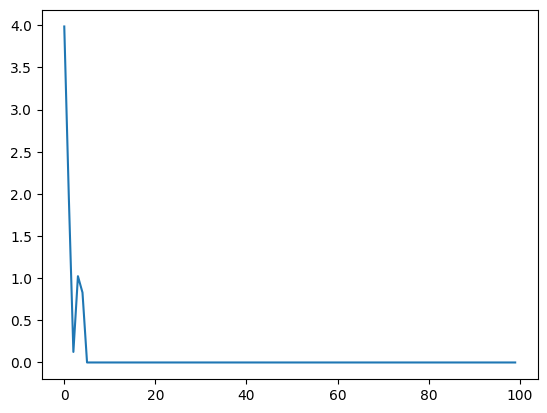

In [7]:
train(text_id, net, lr=1e-3, optimizer='adam', nepochs=100, N=5)

Support for third party widgets will remain active for the duration of the session. To disable support:

next_word='controller'

a 0.0013727351324632764

an 0.00036907591857016087

and 0.0006267359131015837

applied 0.011942793615162373

as 0.0002375454641878605

back 0.00016682851128280163

by 0.004325773101300001

closedloop 0.00025173614267259836

closing 0.002861523535102606

comes 0.00035118096275255084

contrast 0.0001340117451036349

control 0.00016420558677054942

controller 0.8924869298934937

dynamical 0.00016883158241398633

effect 0.0005489497561939061

eg 0.0013374312547966838

electric 0.0011055131908506155

fed 0.0007834807620383799

feedback 0.0011152984807267785

from 0.0011248779483139515

have 8.882412657840177e-05

in 0.0015097688883543015

incorporates 0.0011001315433532

information 9.753402991918847e-05

input 0.004041056148707867

inputs 0.00012082361354259774

is 6.0804759414168075e-05

its 8.749007247388363e-05

loop 0.00014637068670708686

measured 0.0004880970227532089

motor 0.002974588656798005

name 0.00028950898558832705

nonfeedback 0.00030971295200288296


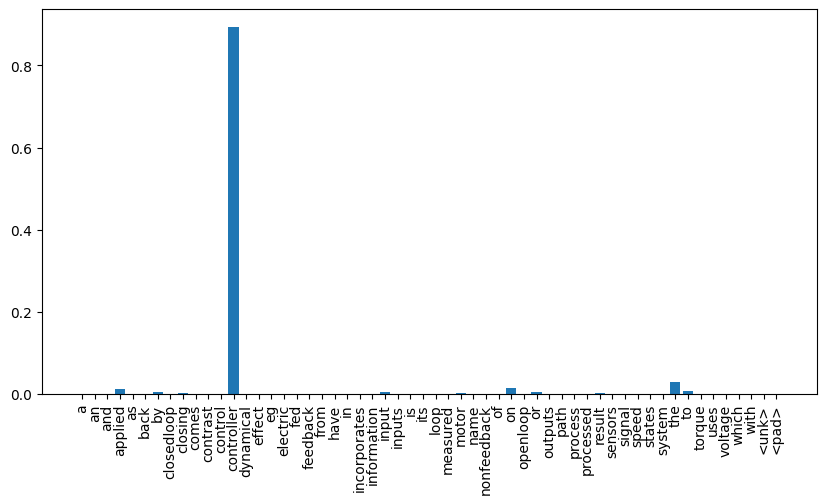

In [ ]:
next_word, prob = predict(net, "closedloop", N=5)
print(f"{next_word=}")
print()
print("Prob")
print("\n".join([f"{id_2_word[i]} {prob[i]}" for i in range(len(prob))]))
plt.figure(figsize=(10, 5))
plt.bar(range(len(prob)), prob)
plt.xticks(range(len(prob)), id_2_word.values(), rotation=90)
plt.show()

In [7]:
test_perplexity = perplexity(net, test_data)
print(f"Test perplexity: {test_perplexity}")

Test perplexity: None


# My solution

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, Dataset
from datasets import load_dataset

In [3]:
train_data = load_dataset('Salesforce/wikitext','wikitext-2-v1')
test_data = load_dataset('Salesforce/wikitext','wikitext-103-v1')

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/685k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/618k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

test-00000-of-00001.parquet:   0%|          | 0.00/722k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/655k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [4]:
train_data, test_data

(DatasetDict({
     test: Dataset({
         features: ['text'],
         num_rows: 4358
     })
     train: Dataset({
         features: ['text'],
         num_rows: 36718
     })
     validation: Dataset({
         features: ['text'],
         num_rows: 3760
     })
 }),
 DatasetDict({
     test: Dataset({
         features: ['text'],
         num_rows: 4358
     })
     train: Dataset({
         features: ['text'],
         num_rows: 1801350
     })
     validation: Dataset({
         features: ['text'],
         num_rows: 3760
     })
 }))

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from collections import Counter

ss = SnowballStemmer('english')
sw = stopwords.words('english')

In [19]:
test_data['test'][0]

{'text': ''}

In [167]:
from torch.nn.utils.rnn import pad_sequence

class NeuralNetworkDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.dataset = self.dataset.map(self.preprocess)
        self.create_vocab()
        self.dataset = self.dataset.map(self.remove_rare_tokens)
        self.dataset = self.dataset.map(self.text2id)
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        row = self.dataset[idx]
        text_ids = row['text_id']
        return text_ids
    
    def preprocess(self, row):
        row['all_tokens'] = [ss.stem(i) for i in 
                             re.split(r" +",
                                  re.sub(r"[^a-z@# ]","",
                                         row['text'].lower()))
                            if (i not in sw) and len(i)]
        return row
    
    def create_vocab(self):
        counts = Counter([i for s in self.dataset['all_tokens'] for i in s])
        counts = {k:v for k, v in counts.items() if v>10} # filtering
        self.vocab = list(counts.keys())
        self.vocab.append('<pad>')
        self.vocab.append('<unk>')
        self.n_v = len(self.vocab)
        self.id2tok = dict(enumerate(self.vocab))
        self.tok2id = {token: id for id, token in self.id2tok.items()}

    def remove_rare_tokens(self, row):
        row['tokens'] = [t for t in row['all_tokens'] if t in self.vocab]
        return row
    
    def text2id(self, row):
        row['text_id'] = [self.tok2id.get(w, self.tok2id['<unk>']) for s in row['all_tokens'] for w in s]
        return row
    
    def collate_fn(self, batch):
        return pad_sequence([torch.tensor(item) for item in batch], batch_first=True, padding_value=self.tok2id['<pad>'])

In [168]:
trainset = NeuralNetworkDataset(train_data['train'])

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

In [169]:
testset = NeuralNetworkDataset(test_data['test'])

In [66]:
len(testset), len(trainset)

(4358, 36718)

In [171]:
trainloader = DataLoader(trainset, batch_size=1, shuffle=True, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=1, shuffle=False, collate_fn=testset.collate_fn)
# test
next(iter(trainloader)), next(iter(testloader))

(tensor([[ 992, 8206,   79,   79, 8206, 8206, 8206, 8206, 8206, 8206, 2388, 8206,
          1864, 2388,   79, 2388, 2027, 8206,  982, 2280, 8206, 4551, 8206, 2027,
          2027, 2388, 4551, 8206, 2388,  992,  928, 2027, 8206, 8206, 8206,  928,
           928, 8206,   79, 8206, 8206, 8206, 8206, 8206,   79, 1864,  928,  982,
          8206, 8206, 8206, 8206,  928, 1780, 8206,  992, 2388, 2027,  719, 8206,
           982,  982, 8206, 8206,  928, 2027, 8206, 8206, 8206,  928, 8206,  982,
          8206, 8206,  982, 8206, 1443, 8206, 8206,   79, 8206, 2388, 2027, 2388,
          8206, 8206,  928, 8206, 8206,  719, 8206,   79, 8206,  982, 8206, 2388,
          8206,   79,  928,  982, 8206, 2027, 1413, 8206, 8206,   79, 4551, 8206,
          8206,  928, 8206, 8206,   79, 1864, 2388,   79, 1406, 8206, 8206,  928,
          8206, 8206, 8206, 2388, 2027,  928, 8206, 8206, 1443,  928,  928, 2388,
          8206, 8206, 1443,   79, 8206, 8206, 8206, 8206, 8206, 8206, 2388, 1780,
          2388, 

In [158]:
testset.dataset['text'][3]

' Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the <unk> Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . \n'

In [157]:
testset.dataset['all_tokens'][3]

['robert',
 'boulter',
 'english',
 'film',
 'televis',
 'theatr',
 'actor',
 'guest',
 '@@',
 'star',
 'role',
 'televis',
 'seri',
 'bill',
 'follow',
 'star',
 'role',
 'play',
 'heron',
 'written',
 'simon',
 'stephen',
 'perform',
 'royal',
 'court',
 'theatr',
 'guest',
 'role',
 'televis',
 'seri',
 'judg',
 'john',
 'deed',
 'boulter',
 'land',
 'role',
 'craig',
 'episod',
 'teddi',
 'stori',
 'televis',
 'seri',
 'long',
 'firm',
 'star',
 'alongsid',
 'actor',
 'mark',
 'strong',
 'derek',
 'jacobi',
 'cast',
 'theatr',
 'product',
 'philip',
 'ridley',
 'play',
 'mercuri',
 'fur',
 'perform',
 'drum',
 'theatr',
 'plymouth',
 'unk',
 'chocol',
 'factori',
 'london',
 'direct',
 'john',
 'tiffani',
 'star',
 'alongsid',
 'ben',
 'whishaw',
 'shane',
 'zaza',
 'harri',
 'kent',
 'fraser',
 'ayr',
 'sophi',
 'stanton',
 'domin',
 'hall']

In [159]:
testset[3]

[1235,
 2160,
 1401,
 749,
 1235,
 2160,
 1401,
 2160,
 1431,
 1426,
 2160,
 749,
 1235,
 749,
 1929,
 2160,
 1426,
 2160,
 2160,
 936,
 1436,
 2160,
 1426,
 2160,
 2160,
 749,
 1426,
 749,
 1861,
 2160,
 2160,
 2160,
 936,
 749,
 2160,
 2160,
 1235,
 2160,
 750,
 2160,
 2160,
 1235,
 2160,
 1431,
 749,
 2160,
 2160,
 2160,
 2160,
 2160,
 2160,
 2160,
 1235,
 1235,
 2160,
 1426,
 749,
 2160,
 749,
 1426,
 749,
 1861,
 2160,
 2160,
 2160,
 749,
 1235,
 2160,
 1401,
 2160,
 1426,
 1426,
 1436,
 2160,
 1426,
 1426,
 2160,
 1477,
 2160,
 2160,
 2160,
 1235,
 1235,
 2160,
 1426,
 749,
 637,
 1426,
 2160,
 2160,
 936,
 749,
 1235,
 2160,
 1929,
 1477,
 1235,
 2160,
 2160,
 2160,
 749,
 1929,
 2160,
 2160,
 2160,
 2160,
 1929,
 2160,
 2160,
 749,
 637,
 936,
 749,
 1929,
 637,
 749,
 1235,
 1436,
 2160,
 1235,
 2160,
 1235,
 2160,
 2160,
 2160,
 1426,
 750,
 2160,
 1431,
 1235,
 2160,
 2160,
 936,
 749,
 2160,
 2160,
 1235,
 2160,
 1431,
 749,
 2160,
 2160,
 1235,
 2160,
 1426,
 749,
 2160,
 

In [95]:
class NeuralLanguageModel(nn.Module):
    def __init__(self, v_size, dim, w_size, n_hidden):
        super(NeuralLanguageModel, self).__init__()
        self.model = nn.Sequential(
            nn.Embedding(num_embeddings=v_size, embedding_dim=dim),
            nn.LeakyReLU(negative_slope=0.15),
            nn.Flatten(),
            nn.Linear(in_features=dim*w_size, out_features=n_hidden),
            nn.LeakyReLU(negative_slope=0.15),
            nn.Linear(in_features=n_hidden, out_features=n_hidden),
            nn.LeakyReLU(negative_slope=0.15),
            nn.Linear(in_features=n_hidden, out_features=v_size)
        )

    def forward(self, x):
        return self.model(x)

In [116]:
!pip install torchsummary

In [118]:
vocab=trainset.vocab
v_size=len(vocab)

neural_model = NeuralLanguageModel(v_size=v_size, dim=100, w_size=5, n_hidden=512)
neural_model

NeuralLanguageModel(
  (model): Sequential(
    (0): Embedding(8207, 100)
    (1): LeakyReLU(negative_slope=0.15)
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=500, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.15)
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): LeakyReLU(negative_slope=0.15)
    (7): Linear(in_features=512, out_features=8207, bias=True)
  )
)

In [172]:
config =  {
        "train_batch_size": 2,
        "val_batch_size": 2,
        "shuffle": True,
        "lr": 1e-3,
        "epochs": 20,
        "train_steps":1, 
        "val_steps":1, 
        "checkpoint_frequency": 1
        }

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(neural_model.parameters(), lr = config['lr'])
device = "cuda" if torch.cuda.is_available() else "cpu"

In [49]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 38.8 MB/s eta 0:00:00


In [189]:
import lightning as L
import os
from tqdm import tqdm

class Trainer:
    def __init__(self, model, criterion, vocab, dataloader, optimizer, device, config, w_size):
        self.model = model.to(device)
        self.criterion = criterion
        self.vocab = vocab
        self.dataloader = dataloader
        self.optimizer = optimizer
        self.device = device
        self.w_size = w_size
        self.config = config
        self.loss = {
            "train": [],
            "val": []
        }
        
    def train(self):
        
        for epoch in tqdm(range(self.config['epochs'])):
                self.train_step()
                self.val_step()
                
                print(f"Epoch: {epoch + 1}/{self.config['epochs']}, Train Loss {self.loss['train'][-1]:.5f}, Val Loss {self.loss['val'][-1]:.5f}")

    def train_step(self):
        running_loss = []
        for idx, sentence in enumerate(self.dataloader):
            if sentence.shape[1] == 0:
                continue
#             print(f"sentence[1]: {sentence.shape[1]}| len(sentence): {len(sentence)}")
            for i in range(sentence.shape[1] - self.w_size):
                inputs = torch.LongTensor(sentence[0][i:i+self.w_size]).reshape(1, -1).to(device)
                target = torch.LongTensor([sentence[0][i+self.w_size]]).to(device)
                output = self.model(inputs)
                loss = self.criterion(output, target)
#                 print(f"output {output} | target {target}")
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                running_loss.append([loss.item()])
        self.loss['train'].append(np.mean(running_loss))
    
    def val_step(self):
        val_loss = []
        self.model.eval()
        
        with torch.inference_mode():
            for idx, sentence in enumerate(self.dataloader, 1):
                if sentence.shape[1] == 0:
                    continue
                for i in range(sentence.shape[1] - self.w_size):
                    inputs = torch.LongTensor(sentence[0][i:i+self.w_size]).reshape(1, -1).to(device)
                    target = torch.LongTensor([sentence[0][i+self.w_size]]).to(device)
                    output = self.model(inputs)
                    loss = self.criterion(output, target)

                    val_loss.append(loss.item())
                
        self.loss['val'].append(np.mean(val_loss))
        
    def save_model(self, save_path):
        model_path = os.path.join(save_dir, "model.pt")
        torch.save(self.model, model_path)

In [ ]:
trainer = Trainer(neural_model, criterion, vocab, trainloader, optimizer, device, config, 5)

trainer.train()

  0%|          | 0/20 [00:00<?, ?it/s]